# Preprocesing

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df_cr = pd.read_csv('/content/drive/MyDrive/Colab Data/crime.csv')

In [27]:
df_cr.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [28]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [29]:
df_cr.shape

(13490604, 7)

In [30]:
df_cr.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [31]:
drop_val = ['lsoa_code', 'minor_category']

In [32]:
df_cr.drop(drop_val, axis=1, inplace=True)

In [33]:
df_cr.set_index('borough', inplace=True)

In [34]:
df_cr.rename(columns={'major_category':'crime'}, inplace=True)

In [35]:
df_cr['year'].value_counts()

2016    1498956
2015    1498956
2014    1498956
2013    1498956
2012    1498956
2011    1498956
2010    1498956
2009    1498956
2008    1498956
Name: year, dtype: int64

# The Number of Crime Incidents from 2008 to 2016

The graph bellow shown the changes number of crime incident from 2008-2016

In [36]:
df_sorted_year = df_cr.groupby('year').sum()

Text(0.5, 1.0, 'The Number of Crime Incidents from 2008 to 2016')

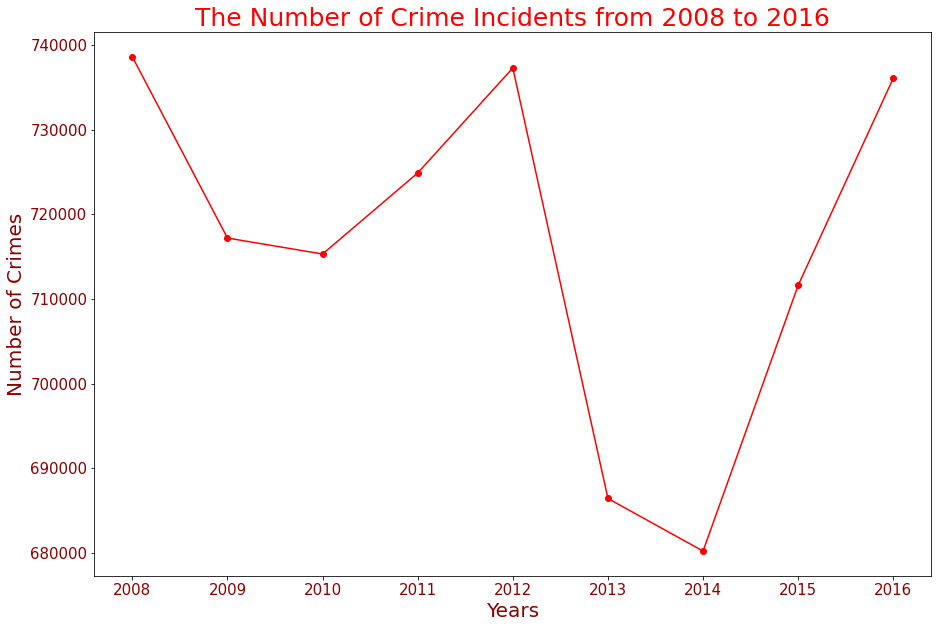

In [37]:
df_2008_2016 = df_sorted_year['value']
df_2008_2016.plot(kind='line', figsize=(15,10), color='Red', marker='o')

plt.xticks(fontsize=15, color='darkred')
plt.yticks(fontsize=15, color='darkred')
plt.xlabel('Years', fontsize=20, color='darkred')
plt.ylabel('Number of Crimes', fontsize=20, color='darkred')
plt.title('The Number of Crime Incidents from 2008 to 2016', fontsize=25, color='red')

#Top 5 Area of Crimes in 2008

In [ ]:
The graph bellow shown the top 5 dangerous area that happen in most high count of crime's year.

In [38]:
df_sorted_year_2008 = df_cr[df_cr["year"]==2008]
df_2008_area = df_sorted_year_2008.groupby('borough').sum()

In [39]:
df_top5_area_2008 = df_2008_area['value']
df_top5_area_2008 = df_top5_area_2008.sort_values(ascending=False)

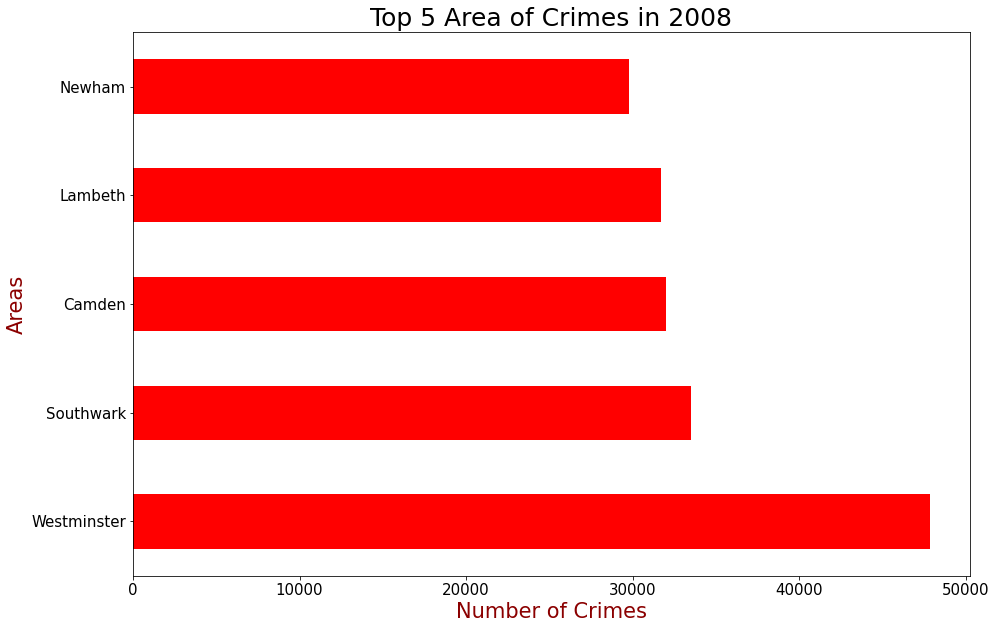

In [40]:
df_top5_area_2008 = df_top5_area_2008.head()
df_top5_area_2008.plot(kind="barh", figsize=(15,10), color='red', fontsize=15)

plt.title("Top 5 Area of Crimes in 2008", fontsize=25)
plt.xlabel("Number of Crimes", fontsize=21, color='darkred')
plt.ylabel("Areas", fontsize=21, color='darkred')
plt.show()

# Crime Rates in Westminster on 2008

the graph bellow shown kind of crimes that happen in most dangerous area in the highest year of crime from 2008-2016

In [52]:
df_crime_westminster=df_2008_cr.groupby(by='crime', axis=0).sum()

In [43]:
df_cri=df_cr.sort_values(by='value', ascending=False)

In [44]:
df_2008_cr = df_cri[df_cri['year']==2008]

In [58]:
df_crime_westminster.drop(['month', 'year'], axis=1)

,value
crime,
Burglary,88092
Criminal Damage,91872
Drugs,68804
Fraud or Forgery,5325
Other Notifiable Offences,10112
Robbery,29627
Sexual Offences,1273
Theft and Handling,283692
Violence Against the Person,159844


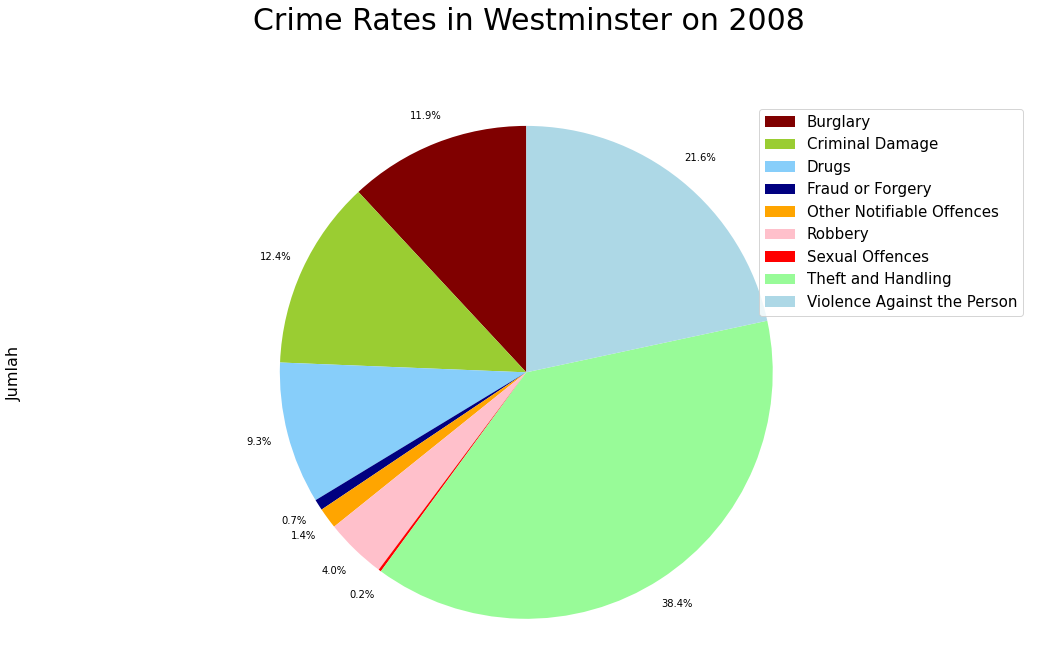

In [59]:
df_crime_westminster['value'].plot(kind="pie", 
                            figsize=(18,10), 
                            autopct='%1.1f%%', 
                            pctdistance=1.12,
                            labels=None,
                            startangle=90, 
                            colors=['maroon','yellowgreen','lightskyblue','navy','orange','pink','red', 'palegreen', 'lightblue'])

plt.axis('equal')
plt.legend(df_crime_westminster.index, loc='upper right', fontsize=15)
plt.title('Crime Rates in Westminster on 2008', y=1.12, fontsize=30) 
plt.ylabel("Jumlah",fontsize=16)
plt.show()

# Boxplot of Crime in 2008,2012 & 2016

In [60]:
a=df_cr.reset_index()

In [61]:
a=a.groupby(by='crime').sum()

In [62]:
a=a.drop(['value', 'year','month'], axis=1)

In [63]:
a[2008] = np.nan
a[2012] = np.nan
a[2016] = np.nan

In [64]:
a

,2008,2012,2016
crime,,,
Burglary,NaN,NaN,NaN
Criminal Damage,NaN,NaN,NaN
Drugs,NaN,NaN,NaN
Fraud or Forgery,NaN,NaN,NaN
Other Notifiable Offences,NaN,NaN,NaN
Robbery,NaN,NaN,NaN
Sexual Offences,NaN,NaN,NaN
Theft and Handling,NaN,NaN,NaN
Violence Against the Person,NaN,NaN,NaN


In [65]:
df_cr_2008 = df_cr[df_cr["year"]==2008]

In [66]:
df_cr_2008 = df_cr_2008.groupby(by='crime')['value'].sum()

In [67]:
df_cr_2008

crime
Burglary                        88092
Criminal Damage                 91872
Drugs                           68804
Fraud or Forgery                 5325
Other Notifiable Offences       10112
Robbery                         29627
Sexual Offences                  1273
Theft and Handling             283692
Violence Against the Person    159844
Name: value, dtype: int64

In [68]:
a[2008].fillna(df_cr_2008, inplace=True)

In [69]:
a

,2008,2012,2016
crime,,,
Burglary,88092.0,NaN,NaN
Criminal Damage,91872.0,NaN,NaN
Drugs,68804.0,NaN,NaN
Fraud or Forgery,5325.0,NaN,NaN
Other Notifiable Offences,10112.0,NaN,NaN
Robbery,29627.0,NaN,NaN
Sexual Offences,1273.0,NaN,NaN
Theft and Handling,283692.0,NaN,NaN
Violence Against the Person,159844.0,NaN,NaN


In [70]:
df_cr_2012 = df_cr[df_cr["year"]==2012]

In [71]:
df_cr_2012 = df_cr_2012.groupby(by='crime')['value'].sum()

In [72]:
a[2012].fillna(df_cr_2012, inplace=True)

In [73]:
df_cr_2016 = df_cr[df_cr["year"]==2016]
df_cr_2016 = df_cr_2016.groupby(by='crime')['value'].sum()
a[2016].fillna(df_cr_2016, inplace=True)

In [74]:
a

,2008,2012,2016
crime,,,
Burglary,88092.0,93392.0,68285.0
Criminal Damage,91872.0,62158.0,64071.0
Drugs,68804.0,51776.0,38914.0
Fraud or Forgery,5325.0,0.0,0.0
Other Notifiable Offences,10112.0,10675.0,15809.0
Robbery,29627.0,35260.0,22528.0
Sexual Offences,1273.0,0.0,0.0
Theft and Handling,283692.0,334054.0,294133.0
Violence Against the Person,159844.0,150014.0,232381.0


In [75]:
a = a[[2008,2012,2016]].astype('int64')

In [76]:
a=a.transpose()

Text(0.5, 0, 'Crime')

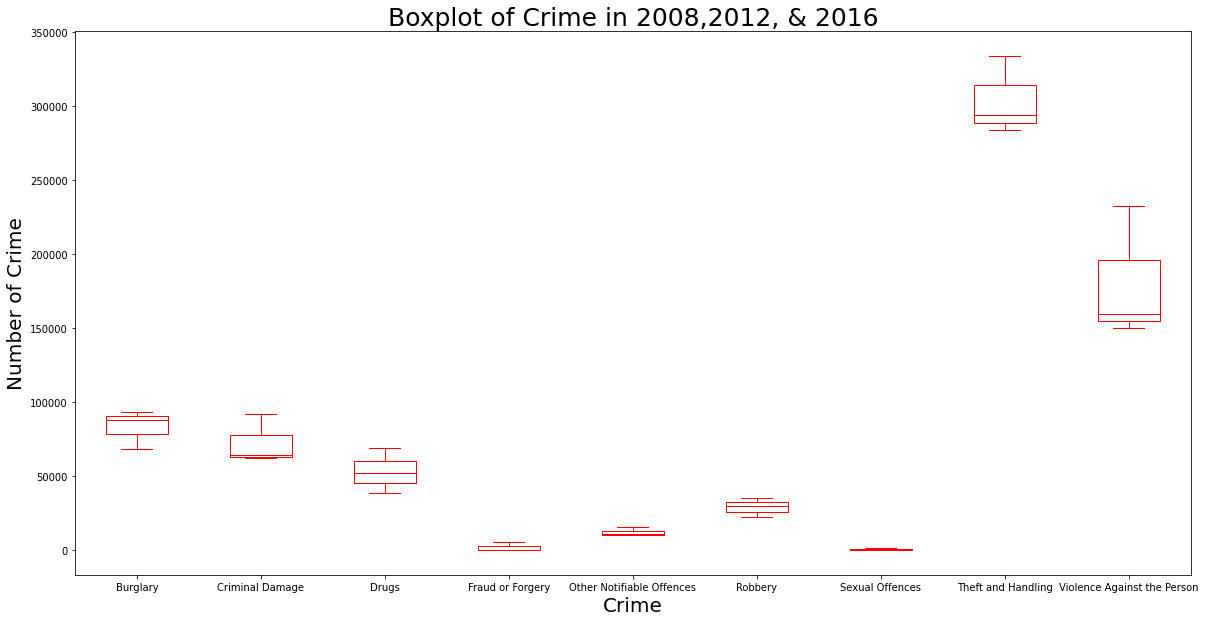

In [77]:
a.plot(kind='box', figsize=(20,10), color='red')

plt.title('Boxplot of Crime in 2008,2012, & 2016', fontsize=25)
plt.ylabel('Number of Crime', fontsize=20)
plt.xlabel('Crime', fontsize=20)

In [78]:
a

crime,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2016,68285,64071,38914,0,15809,22528,0,294133,232381


# Change Number of Crime in 2008, 2012 & 2016

The graph bellow shown the changes in the number of crime in top 3 year highest count of crime.

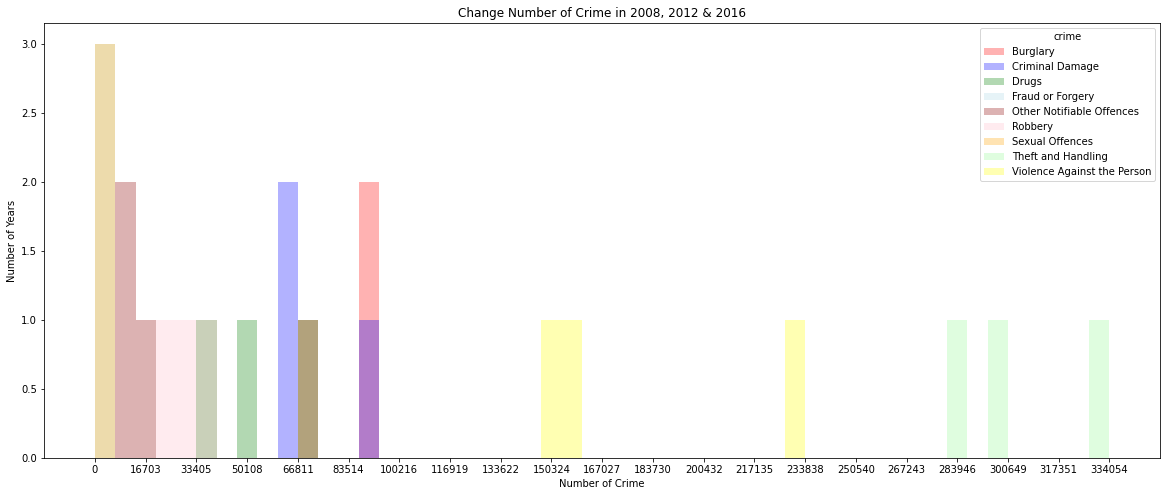

In [79]:
count, bin_edges = np.histogram(a, bins=20)

a.plot(kind="hist", bins=50, xticks=bin_edges, figsize=(20,8), alpha=0.3, color=["red","blue","green", "lightblue","darkred","pink", "orange", "palegreen", "yellow"])

plt.title("Change Number of Crime in 2008, 2012 & 2016")
plt.ylabel("Number of Years")
plt.xlabel("Number of Crime")

plt.show()

# Crime Areas in London

The graph bellow sort most dangerous area to safest area by count of the crime.

In [80]:
from PIL import Image

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')

In [81]:
df_sorted_area = df_cr.groupby(by='borough').sum()
df_sorted_area.drop(['year', 'month'], axis=1, inplace=True)
df_sorted_area

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


In [84]:
total_value = df_sorted_area.sum()
total_value

value    6447758
dtype: int64

In [85]:
max_words = 1000
word_string = ""
for country in df_sorted_area.index.values:
    if (len(country.split(" ")) > 1):
        s_country = country.split(" ") # dari "United States of America"
        s_country = "".join(s_country) # jadi "UnitedStatesofAmerica"
    else:
        s_country = country 
    repeat_num = int( df_sorted_area.loc[country, 'value']/float(total_value) * max_words )
    word_string += (s_country + ' ') * repeat_num
print(len(word_string))

10058


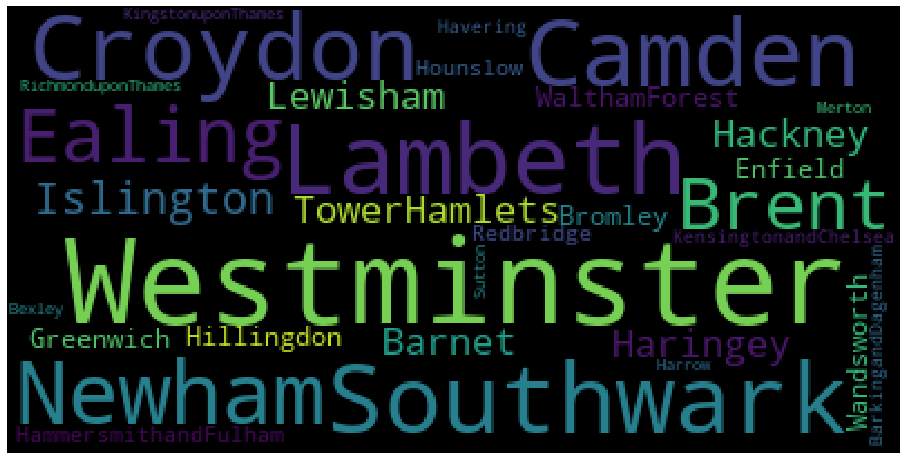

In [86]:
can_immi_wordcloud = WordCloud(
    background_color="black",
    collocations=False
)
can_immi_wordcloud.generate(word_string)

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(18)

plt.imshow(can_immi_wordcloud, interpolation='none')
plt.axis('off')
plt.show()

# Number of Crime for Each Month in 2008




2008 is the highest number of crime from 2008-2016. The graph bellow shown changes in the number of crimes for each month in 2008.

In [87]:
month_2008 = df_cr[df_cr['year']==2008]
month_2008 = month_2008.groupby(by=['month']).sum()
month_2008.sort_values(by='value', inplace=True)

In [88]:
month_2008 = pd.DataFrame(month_2008)
month_2008.reset_index(inplace=True)
month_2008.drop('year', axis=1, inplace=True)
month_2008

,month,value
0,12,57488
1,9,58414
2,4,59640
3,8,59959
4,3,61343
5,11,61395
6,6,62290
7,5,62587
8,2,62626
9,10,63354


In [89]:
month_2008.sort_values(by='month', ascending=True, inplace=True)
month_2008.columns=['month', 'value']

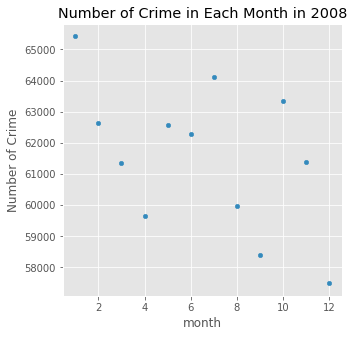

In [93]:
month_2008.plot(kind="scatter", x='month', y='value', figsize=(5,5))

plt.title('Number of Crime in Each Month in 2008')
plt.ylabel('Number of Crime')

plt.show()